In [3]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
from vega_datasets import data
df = data.sf_temps()

df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [6]:
df.shape

(8759, 2)

#### Question 1: Resample by the day and take the average temperature. Visualize the average temperature over time.

In [9]:
df.date = pd.to_datetime(df.date, format = '%Y-%m-%d %I-%p') ## converting to date time

df.date ## maiking sure we have a date time

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [11]:
## setting date as index and sorting for vis purposes

df = df.set_index('date').sort_index()  

In [12]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [13]:
df.resample('D').mean() #resample the whole dataframe using day and mean as an aggregator

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


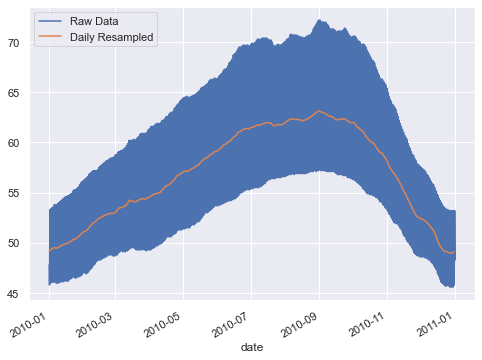

In [19]:
df.temp.plot(label = 'Raw Data')
df.resample('D').mean().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Question 2: Write the code necessary to visualize the minimum temperature over time.

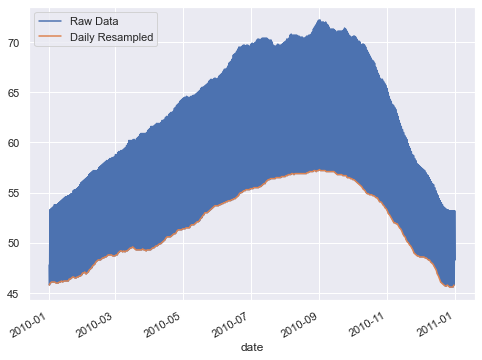

In [20]:
df.temp.plot(label = 'Raw Data')
df.resample('D').min().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Question 3: Write the code necessary to visualize the maximum temperature over time.


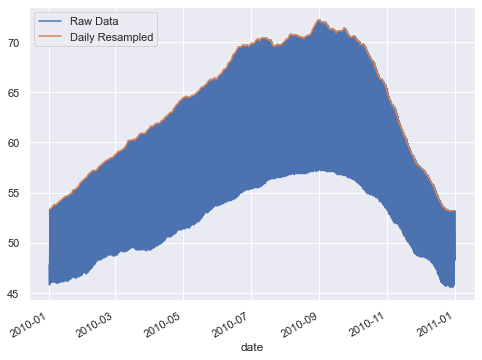

In [21]:
df.temp.plot(label = 'Raw Data')
df.resample('D').max().temp.plot(label = 'Daily Resampled')
plt.legend()

#### Combining One, Two, and Three

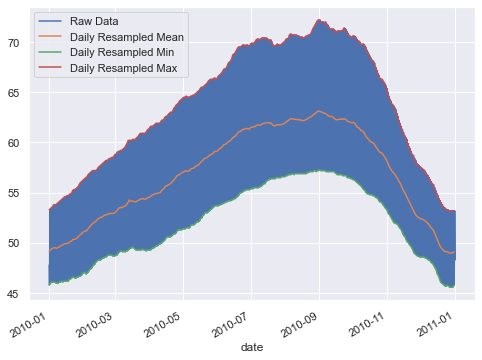

In [23]:
df.temp.plot(label = 'Raw Data')
df.resample('D').mean().temp.plot(label = 'Daily Resampled Mean')
df.resample('D').min().temp.plot(label = 'Daily Resampled Min')
df.resample('D').max().temp.plot(label = 'Daily Resampled Max')
plt.legend()
plt.show()

#### Question 4: Which month is the coldest, on average?


In [24]:
df.resample('M').mean().sort_values(by = 'temp') ## code answer 

,temp
date,
2010-01-31,49.98
2010-12-31,50.50
2010-02-28,52.24
2010-03-31,53.96
2010-11-30,55.19
2010-04-30,55.63
2010-05-31,57.97
2010-10-31,60.25
2010-06-30,60.44


<AxesSubplot:xlabel='date'>

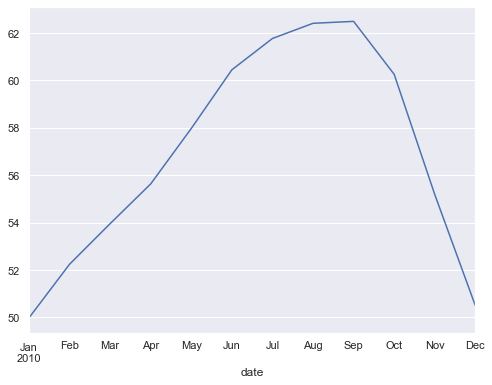

In [25]:
df.resample('M').mean().temp.plot() ## Visual Answer

The coldest month on average is January

#### Question 5: Which month has the highest average temperature?


In [26]:
df.resample('M').mean().sort_values(by = 'temp', ascending = False) ## code answer

,temp
date,
2010-09-30,62.49
2010-08-31,62.41
2010-07-31,61.77
2010-06-30,60.44
2010-10-31,60.25
2010-05-31,57.97
2010-04-30,55.63
2010-11-30,55.19
2010-03-31,53.96


<AxesSubplot:xlabel='date'>

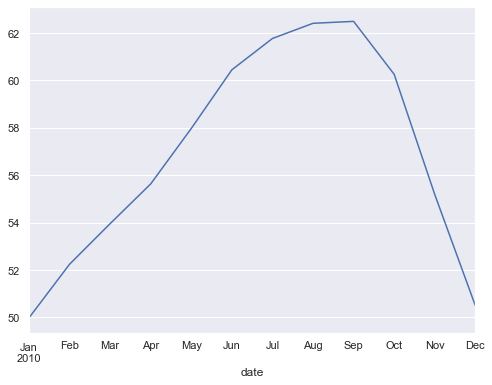

In [27]:
df.resample('M').mean().temp.plot() ## visual answer

September is the hottest month on average

#### Question 6: Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [29]:
diff_df = df.resample('D').agg(['min','max']) ## making my multi index resample

diff_df.head()

temp      
             min   max
date                  
2010-01-01 45.80 53.30
2010-01-02 46.00 53.40
2010-01-03 46.10 53.50
2010-01-04 46.10 53.60
2010-01-05 46.10 53.80

In [31]:
diff_df.columns ## looking at the multi index formatting

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [32]:
## making my variance column by subtracting the multi indexes

diff_df['variance'] = diff_df[('temp', 'max')] - diff_df[('temp', 'min')]

diff_df.head()

temp       variance
             min   max         
date                           
2010-01-01 45.80 53.30     7.50
2010-01-02 46.00 53.40     7.40
2010-01-03 46.10 53.50     7.40
2010-01-04 46.10 53.60     7.50
2010-01-05 46.10 53.80     7.70

In [36]:
## code answer by resampling by month and sorting the average in desceding order

diff_df.resample('M').mean().sort_values(by = 'variance', ascending = False)

temp       variance
             min   max         
date                           
2010-09-30 56.90 71.31    14.40
2010-07-31 56.05 70.02    13.98
2010-06-30 54.48 68.43    13.95
2010-08-31 56.94 70.81    13.87
2010-10-31 54.93 68.36    13.43
2010-05-31 52.40 65.31    12.91
2010-04-30 50.33 62.65    12.32
2010-03-31 49.24 60.09    10.85
2010-11-30 50.78 61.01    10.24
2010-02-28 48.06 57.55     9.49
2010-01-31 46.31 54.65     8.34
2010-12-31 47.03 54.95     7.93

<AxesSubplot:xlabel='date'>

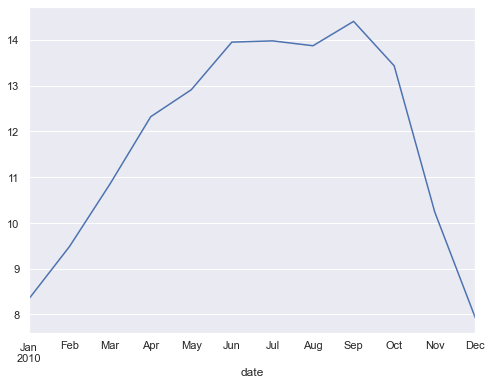

In [37]:
diff_df.resample('M').mean().variance.plot()

The month with the highest daily temperature variability is September

### Seattle Weather dataset

In [40]:
from vega_datasets import data
weather_df = data.seattle_weather()

weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [39]:
type(weather_df.index)

pandas.core.indexes.range.RangeIndex

In [42]:
weather_df.date = pd.to_datetime(weather_df.date, format = '%Y-%m-%d %I-%p') ## converting to date time

weather_df.date ## maiking sure we have a date time

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [43]:
## setting date as index and sorting for vis purposes

weather_df = weather_df.set_index('date').sort_index() 

In [44]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain


#### Question 1: Which year and month combination has the highest amount of precipitation?


In [60]:
weather_df.resample('M').mean().sort_values(by = 'precipitation', ascending = False)

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.18,8.38,3.83,4.34
2014-03-31,7.74,12.91,5.43,3.68
2015-11-30,7.09,9.68,3.48,3.55
2012-11-30,7.02,11.33,5.23,3.22
2012-03-31,5.90,9.55,2.84,4.25
2012-12-31,5.61,7.24,3.29,3.83
2012-01-31,5.59,7.05,1.54,3.90
2014-02-28,5.54,8.20,2.64,4.53
2014-10-31,5.53,17.96,10.88,2.92


In [63]:
weather_df.resample('Y').mean().sort_values(by = 'precipitation', ascending = False)

,precipitation,temp_max,temp_min,wind
date,,,,
2014-12-31,3.38,17.00,8.66,3.39
2012-12-31,3.35,15.28,7.29,3.40
2015-12-31,3.12,17.43,8.84,3.16
2013-12-31,2.27,16.06,8.15,3.02


Demeber has the highest yearly and monthly rain 

#### Question 2: Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

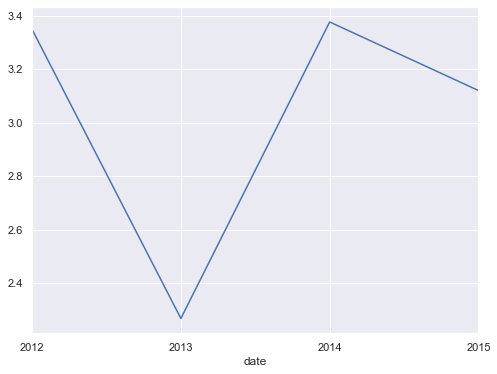

In [67]:
weather_df.resample('Y').mean().precipitation.plot()


<AxesSubplot:xlabel='date'>

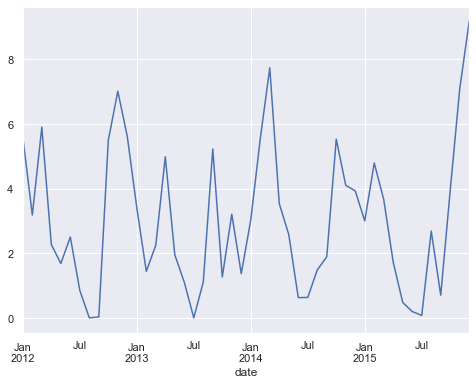

In [68]:
weather_df.resample('M').mean().precipitation.plot()

#### Question 3: Visualize the amount of wind over time. Choose a time interval you think is appropriate.


In [69]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather,daily_rain
date,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,"(2012-01-01 00:00:00, [0.0])"
2012-01-02,10.90,10.60,2.80,4.50,rain,"(2012-01-02 00:00:00, [10.9])"
2012-01-03,0.80,11.70,7.20,2.30,rain,"(2012-01-03 00:00:00, [0.8])"
2012-01-04,20.30,12.20,5.60,4.70,rain,"(2012-01-04 00:00:00, [20.3])"
2012-01-05,1.30,8.90,2.80,6.10,rain,"(2012-01-05 00:00:00, [1.3])"


<AxesSubplot:xlabel='date'>

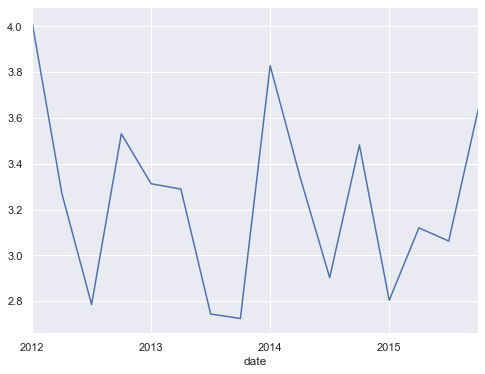

In [97]:
weather_df.resample('Q').mean().wind.plot() ## <-- visualizing quarterly wind changes

#### Question 4: Which year-month combination is the windiest?


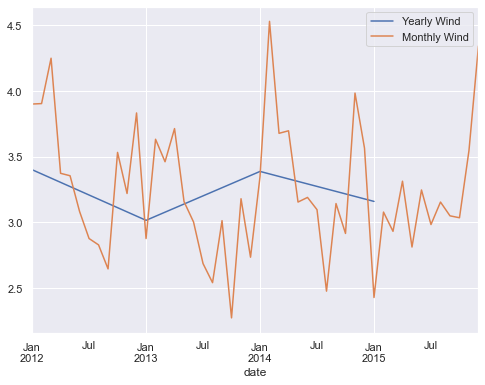

In [74]:
weather_df.resample('Y').mean().wind.plot(label = 'Yearly Wind')
weather_df.resample('M').mean().wind.plot(label = 'Monthly Wind')
plt.legend()
plt.show()

January 2012 has the highest wind combination

#### Question 5: What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [83]:
weather_df.drop(columns = 'daily_rain')

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle
2012-01-02,10.90,10.60,2.80,4.50,rain
2012-01-03,0.80,11.70,7.20,2.30,rain
2012-01-04,20.30,12.20,5.60,4.70,rain
2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...
2015-12-27,8.60,4.40,1.70,2.90,fog
2015-12-28,1.50,5.00,1.70,1.30,fog
2015-12-29,0.00,7.20,0.60,2.60,fog


In [84]:
sunny_df = weather_df[weather_df.weather == 'sun']

In [85]:
sunny_df.head()

,precipitation,temp_max,temp_min,wind,weather,daily_rain
date,,,,,,
2012-01-08,0.00,10.00,2.80,2.00,sun,"(2012-01-08 00:00:00, [0.0])"
2012-01-11,0.00,6.10,-1.10,5.10,sun,"(2012-01-11 00:00:00, [0.0])"
2012-01-12,0.00,6.10,-1.70,1.90,sun,"(2012-01-12 00:00:00, [0.0])"
2012-01-13,0.00,5.00,-2.80,1.30,sun,"(2012-01-13 00:00:00, [0.0])"
2012-02-02,0.00,8.30,1.70,2.60,sun,"(2012-02-02 00:00:00, [0.0])"


In [90]:
sunny_df.resample('Y').weather.value_counts()  ## 2014 has the highest amount of sunny days

date        weather
2012-12-31  sun        118
2013-12-31  sun        205
2014-12-31  sun        211
2015-12-31  sun        180
Name: weather, dtype: int64

#### Question 6: In which month does it rain the most?


In [87]:
rainy_df = weather_df[weather_df.weather == 'rain']

In [93]:
rainy_df.resample('M').weather.value_counts() ## November has the most rainy days

date        weather
2012-01-31  rain       18
2012-02-29  rain       17
2012-03-31  rain       19
2012-04-30  rain       19
2012-05-31  rain       16
2012-06-30  rain       19
2012-07-31  rain       12
2012-08-31  rain        2
2012-09-30  rain        4
2012-10-31  rain       17
2012-11-30  rain       25
2012-12-31  rain       23
2013-01-31  rain       16
2013-02-28  rain       23
2013-03-31  rain       18
2013-07-31  rain        1
2013-08-31  rain        1
2013-10-31  rain        1
2014-07-31  rain        1
2014-08-31  rain        1
2014-10-31  rain        1
2015-01-31  rain        1
2015-04-30  rain        1
2015-08-31  rain        2
2015-10-31  rain        1
Name: weather, dtype: int64

#### Question 7: Which month has the most number of days with a non-zero amount of precipitation?


0.00     838
0.30      54
0.50      40
1.00      26
1.50      25
        ... 
22.60      1
19.80      1
12.40      1
55.90      1
19.10      1
Name: precipitation, Length: 111, dtype: int64

### Flights Data

In [106]:
flights = data.flights_20k()
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


#### Question 1: Convert any negative delays to 0.


In [115]:
flights.delay[flights.delay < 0] = 0

flights.delay.min()

<ipython-input-115-0a0f9a0e2b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights.delay[flights.delay < 0] = 0


0

#### Question 2: Which hour of the day has the highest average delay?


In [116]:
## setting date as index and sorting for vis purposes

flights = flights.set_index('date').sort_index() 

In [117]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [123]:
flights.resample('H').mean().sort_values(by = 'delay', ascending = False)


## 3 AM

,delay,distance
date,,
2001-02-23 03:00:00,360.00,239.00
2001-02-25 00:00:00,260.00,368.00
2001-01-02 03:00:00,245.00,405.00
2001-02-24 22:00:00,210.00,229.00
2001-02-22 00:00:00,195.00,535.00
...,...,...
2001-03-31 01:00:00,nan,nan
2001-03-31 02:00:00,nan,nan
2001-03-31 03:00:00,nan,nan


#### Question 3: Does the day of the week make a difference in the delay amount?


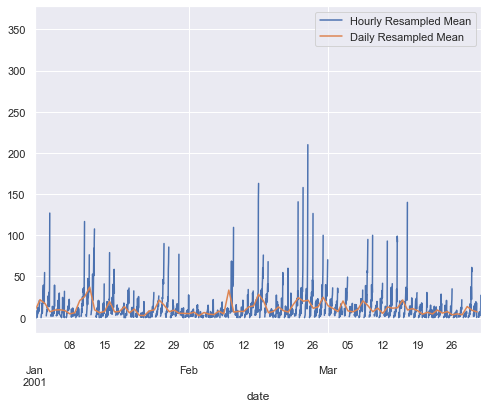

In [125]:
flights.resample('H').mean().delay.plot(label = 'Hourly Resampled Mean')
flights.resample('D').mean().delay.plot(label = 'Daily Resampled Mean')
plt.legend()
plt.show()